In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from google.colab import drive

drive.mount('./gdrive', force_remount=True)
plt.style.use("fivethirtyeight")
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings(action='ignore')

Mounted at ./gdrive


In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/투빅스/Ensemble/ggstore_train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/투빅스/Ensemble/ggstore_test.csv")

In [ ]:
train.rename({'App' : 'app', 'Category' : 'category', 'Reviews' : 'reviews', 'Size' : 'size', 'Type' : 'type',
              'Installs' : 'installs', 'Price' : 'price', 'Content Rating' : 'content_rating','Genres' : 'genres',
              'Last Updated' : 'last_updated', 'Id' :  'id', 'Rating' : 'rating'}, axis = 1, inplace = True)
test.rename({'App' : 'app', 'Category' : 'category', 'Reviews' : 'reviews', 'Size' : 'size', 'Type' : 'type',
             'Installs' : 'installs', 'Price' : 'price', 'Content Rating' : 'content_rating','Genres' : 'genres',
             'Last Updated' : 'last_updated', 'Id' :  'id', 'Rating' : 'rating'}, axis = 1, inplace = True)

# DATA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             5616 non-null   object 
 1   category        5616 non-null   object 
 2   rating          5616 non-null   float64
 3   reviews         5616 non-null   int64  
 4   size            5616 non-null   float64
 5   installs        5616 non-null   float64
 6   type            5616 non-null   int64  
 7   price           5616 non-null   float64
 8   content_rating  5616 non-null   object 
 9   genres          5616 non-null   object 
 10  last_updated    5616 non-null   object 
 11  id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
train.describe()

,rating,reviews,size,installs,type,price,id
count,5616.000000,5.616000e+03,5616.000000,5.616000e+03,5616.000000,5616.000000,5616.000000
mean,4.177386,1.686437e+05,21.831198,5.201445e+06,0.078526,1.409918,2807.500000
std,0.543153,1.126012e+06,22.744877,3.012485e+07,0.269021,20.341193,1621.343887
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,1.140000e+02,5.100000,1.000000e+04,0.000000,0.000000,1403.750000
50%,4.300000,2.158000e+03,13.000000,1.000000e+05,0.000000,0.000000,2807.500000
75%,4.500000,3.292125e+04,30.000000,1.000000e+06,0.000000,0.000000,4211.250000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,1.000000,400.000000,5615.000000


# PREPROCESSING & FEATURES

In [ ]:
# 데이터간 선형 관계가 필요한 feature set과 그렇지 않은 feature set 따로 구성
train_features_linear = []
test_features_linear = []
train_features_nonlinear = []
test_features_nonlinear = []

### NUMERICAL

#### last update

In [ ]:
train['last_updated'].max(), test['last_updated'].max(), train['last_updated'].min(), test['last_updated'].min()

('2018-08-07', '2018-08-08', '2010-05-21', '2011-03-16')

In [ ]:
train['updated_year'] = train['last_updated'].apply(lambda x : int(x[:4]))
train['updated_month'] = train['last_updated'].apply(lambda x : int(x[5:7]))
train['updated_day'] = train['last_updated'].apply(lambda x : int(x[8:]))

test['updated_year'] = test['last_updated'].apply(lambda x : int(x[:4]))
test['updated_month'] = test['last_updated'].apply(lambda x : int(x[5:7]))
test['updated_day'] = test['last_updated'].apply(lambda x : int(x[8:]))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


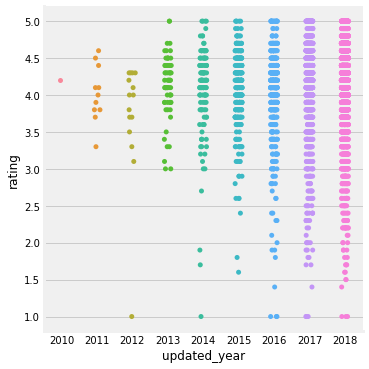

In [ ]:
sns.catplot(x = "updated_year", y = "rating", data = train)

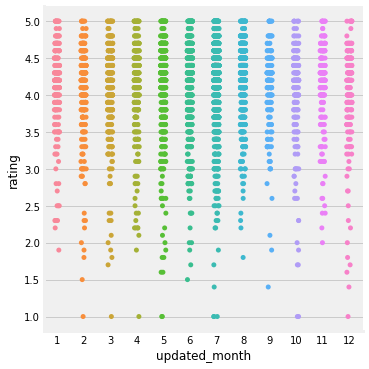

In [ ]:
sns.catplot(x = "updated_month", y = "rating", data = train)

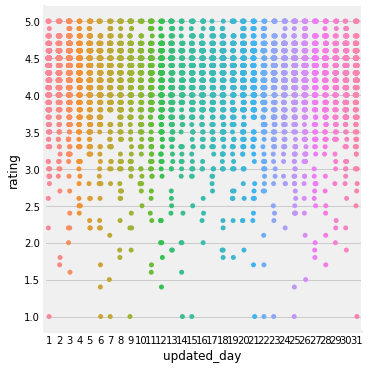

In [ ]:
sns.catplot(x = "updated_day", y = "rating", data = train)

month와 day는 rating을 판단하는데 중요한 근거가 되지 못할 것이라 판단

last_updated.max인 2018-08-08로부터 떨어진 일수를 구한다

In [ ]:
train['past_update'] = (pd.to_datetime('2018-08-08') - pd.to_datetime(train['last_updated'])).dt.days
test['past_update'] = (pd.to_datetime('2018-08-08') - pd.to_datetime(test['last_updated'])).dt.days

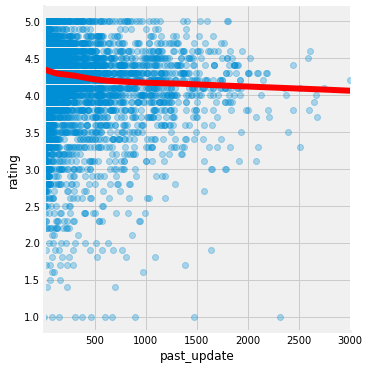

In [ ]:
sns.lmplot(x = 'past_update', y = 'rating', data = train, scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'}, lowess=True)

In [ ]:
f_train = train[['id', 'updated_year', 'past_update']]
f_test = test[['id', 'updated_year', 'past_update']]

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### reviews

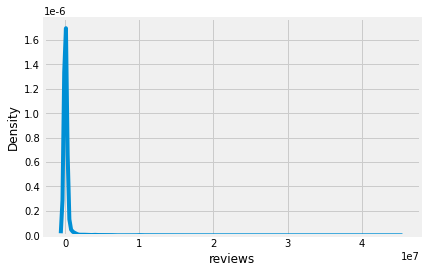

In [ ]:
sns.kdeplot(train['reviews'])

review의 왜도가 너무 심하므로 log변환

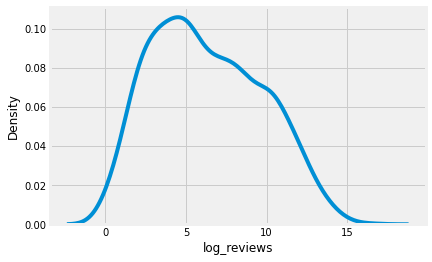

In [ ]:
train['log_reviews'] = np.log(train['reviews'])
test['log_reviews'] = np.log(test['reviews'])
sns.kdeplot(test['log_reviews'])

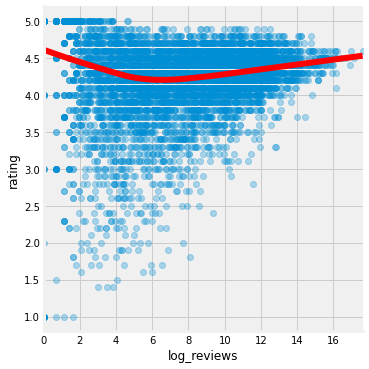

In [ ]:
sns.lmplot(x = 'log_reviews', y = 'rating', data = train, scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'}, lowess=True)

In [ ]:
f_train = train[['id', 'log_reviews']]
f_test = test[['id', 'log_reviews']]

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### size

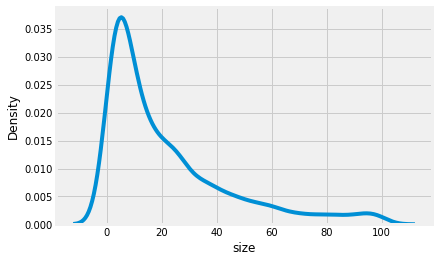

In [ ]:
sns.kdeplot(train['size'])

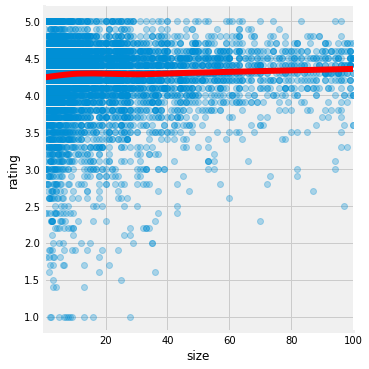

In [ ]:
sns.lmplot(x = 'size', y = 'rating', data = train, scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'}, lowess=True)

In [ ]:
f_train = train[['id', 'size']]
f_test = test[['id', 'size']]

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### installs

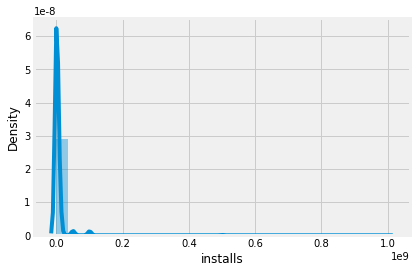

In [ ]:
sns.distplot(train['installs'], bins = 30)

installs의 왜도가 너무 크므로 log변환

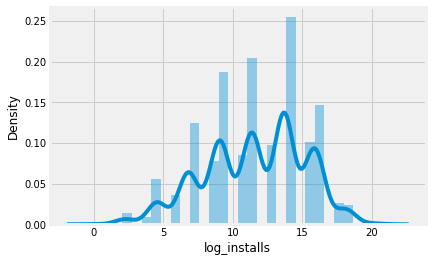

In [ ]:
train['log_installs'] = np.log(train['installs'])
test['log_installs'] = np.log(test['installs'])
sns.distplot(train['log_installs'], bins = 30)

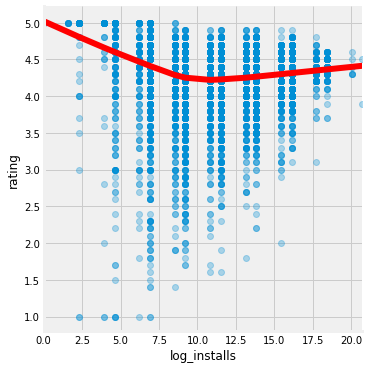

In [ ]:
sns.lmplot(x = 'log_installs', y = 'rating', data = train, scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'}, lowess=True)

In [ ]:
f_train = train[['id', 'log_installs']]
f_test = test[['id', 'log_installs']]

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### type

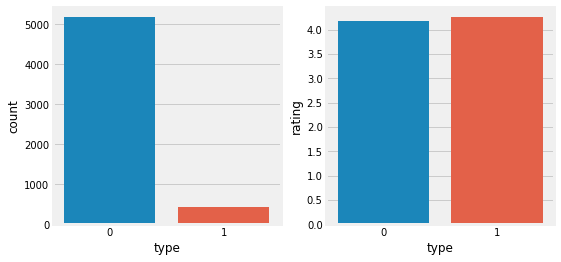

In [ ]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
sns.countplot(train['type'])
plt.subplot(1, 2, 2)
sns.barplot(x = 'type', y = 'rating', data = train.groupby("type")['rating'].mean().reset_index())

type에 따른 rating의 평균적인 차이가 별로 없고 price와 정보가 중복되므로 type변수는 feature로 사용하지 않음

#### price

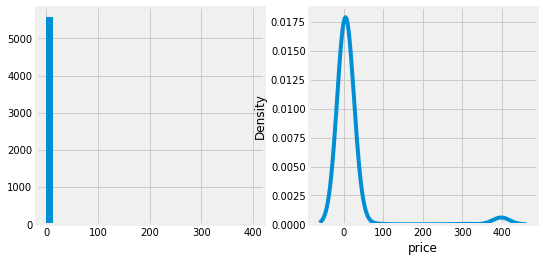

In [ ]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(train['price'], bins = 30)
plt.subplot(1, 2, 2)
sns.kdeplot(train.query("price != 0")['price'])

가격이 0일때의 비중이 압도적이므로 0을 제외한 나머지 데이터의 분위수로 categorize함

In [ ]:
q1 = train.query("price != 0")['price'].quantile(0.2)
q2 = train.query("price != 0")['price'].quantile(0.4)
q3 = train.query("price != 0")['price'].quantile(0.6)
q4 = train.query("price != 0")['price'].quantile(0.8)
q5 = train.query("price != 0")['price'].quantile(0.9)
print('q1 : %s, q2 : %s, q3 : %s, q4 : %s, q5 : %s'%(q1, q2, q3, q4, q5))

q1 : 1.49, q2 : 2.99, q3 : 3.99, q4 : 5.99, q5 : 13.99


In [ ]:
def pre_price(x):
    if x == 0:
        return 0
    elif x <= q1:
        return 1
    elif x <= q2:
        return 2
    elif x <= q3:
        return 3
    elif x <= q3:
        return 4
    elif x <= q4:
        return 5
    elif x <= q5:
        return 6
    else:
        return 7
    
train['cat_price'] = train['price'].apply(pre_price)
test['cat_price'] = test['price'].apply(pre_price)

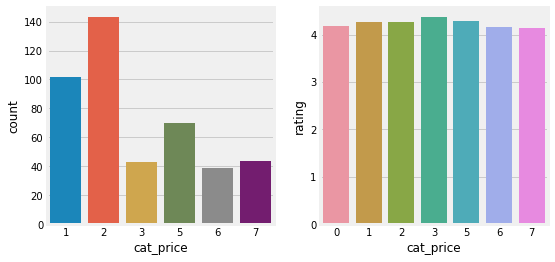

In [ ]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
sns.countplot(train.query("price != 0")['cat_price'])
plt.subplot(1, 2, 2)
sns.barplot(x = 'cat_price', y = 'rating', data = train.groupby("cat_price")['rating'].mean().reset_index())

cat_price의 경우 숫자 간 상하관계가 존재하므로 굳이 dummy변수를 생성하지 않고 사용

In [ ]:
f_train = train[['id', 'cat_price']]
f_test = test[['id', 'cat_price']]

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

### CATEGORICAL

#### content_rating

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


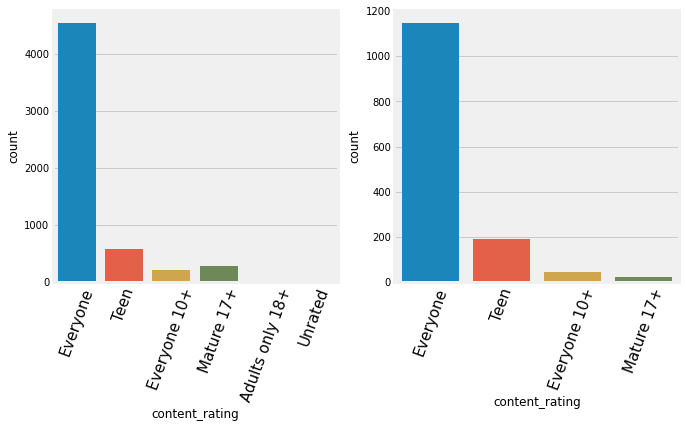

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.countplot(train['content_rating'])
plt.xticks(rotation = 70, fontsize = 15)
plt.subplot(1, 2, 2)
sns.countplot(test['content_rating'])
plt.xticks(rotation = 70, fontsize = 15)
plt.show()

In [ ]:
train.query("content_rating == 'Unrated'")

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,id,updated_year,updated_month,updated_day,past_update,log_reviews,log_installs,cat_price
5246,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000.0,0,0.0,Unrated,Tools,2012-02-27,5246,2012,2,27,2354,7.078342,10.819778,0


In [ ]:
train.query("content_rating == 'Adults only 18+'")

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,id,updated_year,updated_month,updated_day,past_update,log_reviews,log_installs,cat_price
197,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9,500000.0,0,0.0,Adults only 18+,Comics,2018-07-04,197,2018,7,4,35,10.086017,13.122363,0
1737,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41.0,1000000.0,0,0.0,Adults only 18+,Sports,2018-07-24,1737,2018,7,24,15,10.820118,13.815511,0


- train의 Unrated 한 건에 대해 app의 이름과 category가 tools일 때 대부분의 content rating이 everyone인 것을 고려하여 everyone으로 대체
- test와 train의 content rating을 동시에 고려햇을 때 test에는 adult only 18+인 데이터가 존재하지 않고 train에도 2건밖에 없으므로 mature 17+로 대체

In [ ]:
train.loc[5246, 'content_rating'] = 'Everyone'
train['content_rating'] = train['content_rating'].apply(lambda x : 'Mature 17+' if x == 'Adults only 18+'else x)

In [ ]:
train_con_dummy = pd.get_dummies(train['content_rating'])
test_con_dummy =pd.get_dummies(test['content_rating'])

train_con_dummy.columns = ['content_rating_%s'%(i+1) for i in range(len(train_con_dummy.columns))]
test_con_dummy.columns = ['content_rating_%s'%(i+1) for i in range(len(train_con_dummy.columns))]

In [ ]:
f_train = pd.concat([train[['id']], train_con_dummy], axis = 1)
f_test = pd.concat([test[['id']], test_con_dummy], axis = 1)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

In [ ]:
# tree모델을 사용할 때는 굳이 onehotencoding이 필요 없으므로 labelencoding을 해준다
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_con_label = encoder.fit_transform(train['content_rating'])
test_con_label = encoder.transform(test['content_rating'])

In [ ]:
f_train = pd.DataFrame({'id' : train['id'], 'content_rating' : train_con_label})
f_test = pd.DataFrame({'id' : test['id'], 'content_rating' : test_con_label})

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### category

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


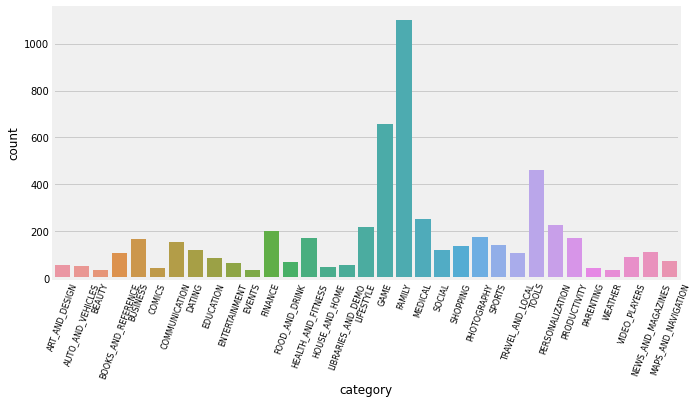

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(train.category)
plt.xticks(rotation = 70, fontsize = 8)
plt.show()

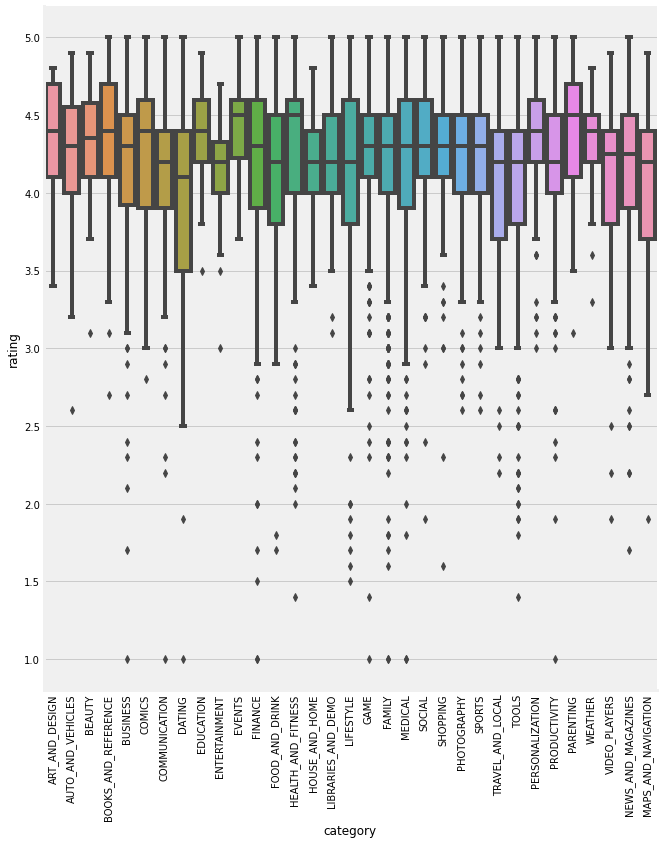

In [ ]:
sns.catplot(x = "category", y = "rating", data = train, kind = "box", height = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [ ]:
n_train = len(train)
total = pd.concat([train, test])

#train data에 test data에 없는 category가 존재하므로 두 데이터를 concat하여 dummy변수를 생성
total_dummy = pd.get_dummies(total['category'], drop_first = True)
train_cat_dummy = total_dummy.iloc[:n_train]
test_cat_dummy = total_dummy.iloc[n_train:]

train_cat_dummy.columns = ['category_%s'%(i+1) for i in range(len(train_cat_dummy.columns))]
test_cat_dummy.columns = ['category_%s'%(i+1) for i in range(len(train_cat_dummy.columns))]

In [ ]:
f_train = pd.concat([train[['id']], train_cat_dummy], axis = 1)
f_test = pd.concat([test[['id']], test_cat_dummy], axis = 1)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

In [ ]:
# tree모델을 사용할 때는 굳이 onehotencoding이 필요 없으므로 labelencoding을 해준다
encoder = LabelEncoder()
train_cat_label = encoder.fit_transform(train['category'])
test_cat_label = encoder.transform(test['category'])

In [ ]:
f_train = pd.DataFrame({'id' : train['id'], 'category' : train_cat_label})
f_test = pd.DataFrame({'id' : test['id'], 'category' : test_cat_label})

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### app

app의 고유값의 개수가 5616으로 너무 많으므로 app에 포함된 단어들을 통해 feature 생성
- word2vec을 활용하여 단어벡터들의 평균벡터를 feature로 활용
- countvectorizer를 이용하여 tdm활용(단어의 최소 빈도수를 적절히 정해준다)

In [ ]:
# contvectorizer와 w2v를 이용함에 있어 특수문자는 불필요하므로 제거
def app_re(x):
    lst = re.findall("[a-zA-Z0-9]+", x.lower())
    lst = [x for x in lst if len(x) != 1]
    return lst

train['app'] = train['app'].apply(app_re)
test['app'] = test['app'].apply(app_re)

In [ ]:
def pre_cv(x):
    string = ""
    for s in x:
        string += s
        string += " "
    return string

train['app_cv'] = train['app'].apply(pre_cv)
test['app_cv'] = test['app'].apply(pre_cv)

w2v

In [ ]:
from gensim.models import Word2Vec
w2v = Word2Vec(sentences = train['app'], size = 45,
               window = 3, min_count = 1, workers = 4, sg = 1, iter = 8, seed = 317)
# skip-gram방식으로 최소 등장 단어를 2로 하여 word2vec을 학습시킵니다.

In [ ]:
# app에 포함된 단어벡터의 평균을 계산합니다
train_mean_vectors = []
for lst in train['app']:
    v = np.zeros(45)
    cnt = 0
    for word in lst:
        try:
            v += w2v.wv[word]
            cnt += 1
        except:
            continue
    if cnt != 0:
      v /= cnt
      train_mean_vectors.append(v)
    else:
      train_mean_vectors.append(v)
train_mean_vectors = np.array(train_mean_vectors)

test_mean_vectors = []
for lst in test['app']:
    v = np.zeros(45)
    cnt = 0
    for word in lst:
        try:
            v += w2v.wv[word]
            cnt += 1
        except:
            continue
    if cnt != 0:
      v /= cnt
      test_mean_vectors.append(v)
    else:
      test_mean_vectors.append(v)
test_mean_vectors = np.array(test_mean_vectors)

In [ ]:
train_mean_vectors = pd.DataFrame(train_mean_vectors)
test_mean_vectors = pd.DataFrame(test_mean_vectors)

train_mean_vectors.columns = ['w2v_%s'%(i+1) for i in range(train_mean_vectors.shape[1])]
test_mean_vectors.columns = ['w2v_%s'%(i+1) for i in range(test_mean_vectors.shape[1])]

In [ ]:
f_train = pd.concat([train[['id']], train_mean_vectors], axis = 1)
f_test = pd.concat([test[['id']], test_mean_vectors], axis = 1)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

tdm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 20, stop_words = 'english') # 20번 미만 등장하는 단어는 count하지 않음
tdm_train = cv.fit_transform(train['app_cv'])
tdm_test = cv.transform(test['app_cv'])

In [ ]:
tdm_train = pd.DataFrame(data = tdm_train.toarray(), columns = ["tdm_"+string for string in cv.get_feature_names()])
tdm_test = pd.DataFrame(data = tdm_test.toarray(), columns = ["tdm_"+string for string in cv.get_feature_names()])

In [ ]:
f_train = pd.concat([train[['id']], tdm_train], axis = 1)
f_test = pd.concat([test[['id']], tdm_test], axis = 1)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

단어의 갯수 및 문자열의 길이

In [ ]:
f_train = train[['app', 'app_cv']].applymap(len)
f_test = test[['app', 'app_cv']].applymap(len)
f_train.columns = ['app_num_words', 'len_app']
f_test.columns = ['app_num_words', 'len_app']

In [ ]:
f_train = pd.concat([train[['id']], f_train], axis = 1)
f_test = pd.concat([test[['id']], f_test], axis = 1)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### genres

In [ ]:
train['genres'].value_counts()[-10:]

Board;Pretend Play                       1
Video Players & Editors;Music & Video    1
Health & Fitness;Education               1
Puzzle;Creativity                        1
Arcade;Pretend Play                      1
Adventure;Education                      1
Adventure;Brain Games                    1
Casual;Music & Video                     1
Parenting;Brain Games                    1
Books & Reference;Education              1
Name: genres, dtype: int64

In [ ]:
genres_dict = {}
for g in train['genres']:
  if g not in genres_dict and ";" not in g:
    genres_dict[g] = 1
  elif g in genres_dict and ";" not in g:
    genres_dict[g] += 1

genres에서 거의 등장하지 않는 것들은 대부분 ';'이 포함되어 있다. 
따라서 ';'이 포함되어있지 않은 것들을 기준으로 genres를 다시 구분한다.

In [ ]:
def genres_preprocessing(x):
  if x in genres_dict:
    return x
  else:
    split = x.split(';')
    tmp = []
    for word in split:
      if word in genres_dict:
        tmp.append(word)
    if len(tmp) == 0:
      return x
    else:
      return tmp[0]
train['re_genres'] = train['genres'].apply(genres_preprocessing)
test['re_genres'] = test['genres'].apply(genres_preprocessing)

In [ ]:
train['re_genres'].value_counts()[-10:]

Parenting                      43
Weather                        37
Beauty                         34
Events                         34
Card                           28
Trivia                         22
Casino                         22
Music                          17
Word                           15
Music & Audio;Music & Video     1
Name: re_genres, dtype: int64

re_genres에 한건인 Music & Audio;Music & Video는 Misuc으로 대체한다.

In [ ]:
train.query("re_genres == 'Music & Audio;Music & Video'")

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,id,updated_year,updated_month,updated_day,past_update,log_reviews,log_installs,cat_price,app_cv,re_genres
1232,"[toy, guitar, with, songs, for, kids]",FAMILY,4.3,1369,9.8,500000.0,0,0.0,Everyone,Music & Audio;Music & Video,2016-03-05,1232,2016,3,5,886,7.221836,13.122363,0,toy guitar with songs for kids,Music & Audio;Music & Video


In [ ]:
train.loc[1232, 're_genres'] = 'Music'

In [ ]:
f_train = pd.get_dummies(train['re_genres'])
f_test = pd.get_dummies(test['re_genres'])
f_train.columns = ['genres_'+str(i) for i in range(1, train['re_genres'].nunique() + 1)]
f_test.columns = ['genres_'+str(i) for i in range(1, train['re_genres'].nunique() + 1)]

In [ ]:
f_train = pd.concat([train[['id']], f_train], axis = 1)
f_test = pd.concat([test[['id']], f_test], axis = 1)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

In [ ]:
encoder = LabelEncoder()
f_train = encoder.fit_transform(train['re_genres'])
f_test = encoder.transform(test['re_genres'])

In [ ]:
f_train = pd.concat([train[['id']], pd.DataFrame(f_train, columns = ['re_genres'])], axis = 1)
f_test = pd.concat([test[['id']], pd.DataFrame(f_test, columns = ['re_genres'])], axis = 1)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### categorical 변수(category, content_rating, re_genres)에 대해서 numerical 변수(log_reviews, size, log_installs, cat_price, past_updated)의 평균을 변수로 활용

In [ ]:
tmp = train.groupby(['category', 'content_rating', 're_genres'])[['log_reviews', 'log_installs', 'cat_price']].mean().reset_index()
tmp.columns = ['category', 'content_rating', 're_genres', 'group_log_reviews', 'group_log_installs', 'group_cat_price']

In [ ]:
f_train = pd.merge(train, tmp, on = ['category', 'content_rating', 're_genres'], how = 'left')[['id', 'group_log_reviews', 'group_log_installs', 'group_cat_price']]
f_test = pd.merge(test, tmp, on = ['category', 'content_rating', 're_genres'], how = 'left')[['id', 'group_log_reviews', 'group_log_installs', 'group_cat_price']]

f_test.fillna(f_test.mean(), inplace = True)

train_features_linear.append(f_train)
test_features_linear.append(f_test)

train_features_nonlinear.append(f_train)
test_features_nonlinear.append(f_test)

#### merge features
생성한 feature들을 하나의 데이터프레임으로 만듬

In [ ]:
train_data_linear = pd.DataFrame({'id' : range(0, 5616)})
for f in train_features_linear:
    train_data_linear = pd.merge(train_data_linear, f, on = 'id')
    
test_data_linear = pd.DataFrame({'id' : range(5617, 7021)})
for f in test_features_linear:
    test_data_linear = pd.merge(test_data_linear, f, on = 'id')

train_data_nonlinear = pd.DataFrame({'id' : range(0, 5616)})
for f in train_features_nonlinear:
    train_data_nonlinear = pd.merge(train_data_nonlinear, f, on = 'id')
    
test_data_nonlinear = pd.DataFrame({'id' : range(5617, 7021)})
for f in test_features_nonlinear:
    test_data_nonlinear = pd.merge(test_data_nonlinear, f, on = 'id')
    
#merge의 key였던 id를 삭제합니다.
train_data_linear.drop("id", axis = 1, inplace = True)
test_data_linear.drop("id", axis = 1, inplace = True)
train_data_nonlinear.drop("id", axis = 1, inplace = True)
test_data_nonlinear.drop("id", axis = 1, inplace = True)

# MODELING

train_data_linear, test_data_linear 데이터를 scaling합니다(standardization)

nonlinear데이터에 대해서는 scaling해줄 필요없습니다

In [ ]:
numerical_var = ['updated_year', 'past_update', 'log_reviews', 'size', 'log_installs', 'cat_price'] + ['w2v_'+str(i) for i in range(1, 46)] + ['app_num_words', 'len_app', 'group_log_reviews', 'group_log_installs', 'group_cat_price']

In [ ]:
mean = train_data_linear[numerical_var].mean()
std = train_data_linear[numerical_var].std()
train_data_linear[numerical_var] = (train_data_linear[numerical_var] - mean) / std
test_data_linear[numerical_var] = (test_data_linear[numerical_var] - mean) / std

In [ ]:
label = train.rating

개별 모델들에 대해 hyper parameter tuning을 진행한 후 앙상블을 수행합니다.


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
regs = []

### hyper parameter tuning
- bayesian optimization을 이용해 하이퍼파라미터를 튜닝합니다.

In [ ]:
!pip install bayesian_optimization
from bayes_opt import BayesianOptimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=ce43fa8d7a7d3e201741f102e8eb55cd8468ff1e4d2f66093c474588999df154
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


#### elasticnet

In [ ]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 317)

In [ ]:
# cv를 이용하여 하이퍼파라미터를 탐색한다.
def el_cv(alpha, l1_ratio, tol):
  rmse = cross_val_score(ElasticNet(alpha = alpha, l1_ratio = l1_ratio, tol = tol, max_iter = 10000, random_state = 317),
                         train_data_linear, label, scoring = 'neg_root_mean_squared_error', cv = kfold).mean()
  return rmse # -rmse를 최대화

# 파라미터 공간
p_bounds = {'alpha' : (0, 1),
            'l1_ratio' : (0.3, 0.7),
            'tol' : (0.00001, 0.0001)}           
el_bo = BayesianOptimization(f = el_cv, pbounds = p_bounds, verbose = 2)
el_bo.maximize(init_points = 30, n_iter = 30)

el_bo.max

In [ ]:
el = ElasticNet(
    alpha = 0.000874869463149075,
    l1_ratio = 0.464191679081694,
    tol = 6.0213648098613026e-05
); regs.append(el)

#### knn


In [ ]:
def knn_cv(leaf_size, p, n_neighbors):
  rmse = cross_val_score(KNeighborsRegressor(n_neighbors = int(n_neighbors),
                                             p = round(p),
                                             leaf_size = int(leaf_size)),
                          train_data_linear, label, scoring = 'neg_root_mean_squared_error', cv = kfold).mean()
  return rmse 

p_bounds = {'n_neighbors' : (10, 150),
            'p' : (1, 2),
            'leaf_size' : (5, 40)}
knn_bo = BayesianOptimization(f = knn_cv,  pbounds = p_bounds, verbose = 2)
knn_bo.maximize(init_points = 20, n_iter = 20)

knn_bo.max

In [ ]:
knn = KNeighborsRegressor(
    n_neighbors = 25,
    p = 2,
    leaf_size = 22
); regs.append(knn)

#### extratree

In [ ]:
def et_cv(max_depth, min_samples_split, max_features):
  rmse = cross_val_score(ExtraTreesRegressor(n_estimators = 700,
                                             max_depth = int(max_depth),
                                             min_samples_split = int(min_samples_split),
                                             max_features = max_features,
                                             random_state = 317),
                         train_data_nonlinear, label, scoring = 'neg_root_mean_squared_error', cv = kfold).mean()
  return rmse

p_bounds = {'max_depth' : (2, 30),
            'min_samples_split' : (2, 15),
            'max_features' : (0.5, 1)}
et_bo = BayesianOptimization(f = et_cv,  pbounds = p_bounds, verbose = 2)
et_bo.maximize(init_points = 20, n_iter = 20)

et_bo.max

In [ ]:
et = ExtraTreesRegressor(
    n_estimators = 500,
    max_depth = 19,
    min_samples_split = 2,
    max_features = 0.9840954183923418,
    random_state = 317,
); regs.append(et)

#### randomforest

In [ ]:
def rf_cv(max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features):
  rmse = cross_val_score(RandomForestRegressor(n_estimators = 500,
                                               max_depth = int(max_depth),
                                               min_samples_split = int(min_samples_split),
                                               min_samples_leaf = int(min_samples_leaf),
                                               min_weight_fraction_leaf = min_weight_fraction_leaf,
                                               max_features = max_features,
                                               n_jobs = -1,
                                               random_state = 317),
                         train_data_nonlinear, label, scoring = 'neg_root_mean_squared_error', cv = kfold).mean()
  return rmse

p_bounds = {'max_depth' : (2, 50),
            'min_samples_split' : (2, 15),
            'min_samples_leaf' : (1, 30),
            'min_weight_fraction_leaf' : (0, 0.5),
            'max_features' : (0.5, 1)}
rf_bo = BayesianOptimization(f = rf_cv,  pbounds = p_bounds, verbose = 2)
rf_bo.maximize(init_points = 20, n_iter = 20)

rf_bo.max

In [ ]:
rf = RandomForestRegressor(
    max_depth = 44,
    max_features = 0.8877294755563332,
    min_samples_leaf = 5,
    min_samples_split = 14,
    min_weight_fraction_leaf = 0.0007128894438556133
); regs.append(rf)

#### xgboost

In [ ]:
def xgb_cv(max_depth, learning_rate, gamma, min_child_weight, subsample, colsample_bytree, reg_alpha, reg_lambda):
  kfold = KFold(n_splits = 3, shuffle = True)
  rmses = []
  for train_idx, val_idx in kfold.split(train_data_nonlinear, label):
    X_train, X_val = train_data_nonlinear.iloc[train_idx], train_data_nonlinear.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]

    regressor = xgb.XGBRegressor(max_depth = int(max_depth),
                                 learning_rate = learning_rate,
                                 gamma = gamma, 
                                 min_child_weight = min_child_weight,
                                 subsample = subsample,
                                 colsample_bytree = colsample_bytree,
                                 reg_alpha = reg_alpha,
                                 reg_lambda = reg_lambda, 
                                 n_estimators = 100000,
                                 verbosity = 0,
                                 objective = 'reg:squarederror',
                                 booster = 'gbtree',
                                 n_jobs = -1,
                                 random_state = 317)
    
    regressor.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')

    y_val_pred = regressor.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    rmses.append(rmse)

  return -np.mean(rmse)

p_bounds = {'max_depth' : (2, 15),
            'learning_rate' : (0.001, 0.1),
            'gamma' : (0, 10),
            'min_child_weight' : (0, 10),
            'subsample' : (0.5, 1),
            'colsample_bytree' : (0.5, 1),
            'reg_alpha' : (0, 1),
            'reg_lambda' : (0, 1)
            }
xgb_bo = BayesianOptimization(f = xgb_cv,  pbounds = p_bounds, verbose = 2)
xgb_bo.maximize(init_points = 30, n_iter = 30)

xgb_bo.max

In [ ]:
xgbr = xgb.XGBRegressor(colsample_bytree = 0.991258240279806,
                        gamma = 1.1410548932005526,
                        learning_rate = 0.0063429218928696554,
                        max_depth = 8,
                        min_child_weight = 9.673029797022997,
                        reg_alhpa = 0.9287154005809088,
                        reg_lambda = 0.47365037852248626,
                        subsample = 0.5941896829819974,
                        n_estimators = 100000,
                        verbosity = 0,
                        objective = 'reg:squarederror',
                        booster = 'gbtree',
                       n_jobs = -1,
                       random_state = 317
); regs.append(xgbr) 

lgbm

In [ ]:
def lgb_cv(num_leaves, max_depth, learning_rate, min_split_gain, min_child_weight, min_child_samples, subsample, colsample_bytree, reg_alpha, reg_lambda):
  kfold = KFold(n_splits = 3, shuffle = True)
  rmses = []
  for train_idx, val_idx in kfold.split(train_data_nonlinear, label):
    X_train, X_val = train_data_nonlinear.iloc[train_idx], train_data_nonlinear.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]
    regressor = lgb.LGBMRegressor(num_leaves = int(num_leaves),
                                  max_depth = int(max_depth),
                                  learning_rate = learning_rate,
                                  min_split_gain = min_split_gain,
                                  min_child_weight = min_child_weight,
                                  min_child_samples = int(min_child_samples),
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree,
                                  reg_alpha = reg_alpha,
                                  reg_lambda = reg_lambda,
                                  boosting_type = 'gbdt',
                                  n_estimators = 100000,
                                  objective = 'regression',
                                  random_state = 317,
                                  )
    
    regressor.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')

    y_val_pred = regressor.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    rmses.append(rmse)

  return -np.mean(rmse)

p_bounds = {'num_leaves' : (10, 300),
            'max_depth' : (1, 30),
            'learning_rate' : (0.001, 0.1),
            'min_split_gain' : (0, 1),
            'min_child_weight' : (0, 1),
            'min_child_samples' : (5, 50),
            'subsample' : (0.5, 1),
            'colsample_bytree' : (0.5, 1),
            'reg_alpha' : (0, 1),
            'reg_lambda' : (0, 1)}
lgb_bo = BayesianOptimization(f = lgb_cv,  pbounds = p_bounds, verbose = 2)
lgb_bo.maximize(init_points = 30, n_iter = 30)

lgb_bo.max

In [ ]:
lgbr = lgb.LGBMRegressor(num_leaves = 13,
                              max_depth = 18,
                              learning_rate = 0.002457503047340548,
                              min_split_gain = 0.3333855103986887,
                              min_child_weight = 0.9676197772595285,
                              min_child_samples = 1,
                              subsample = 0.6166543094945032,
                              colsample_bytree = 0.8617120610970266,
                              reg_alpha = 0.07424749780045459,
                              reg_lambda = 0.2277345144578541,
                              boosting_type = 'gbdt',
                              n_estimators = 1000000,
                              objective = 'regression',
                              random_state = 317); regs.append(lgbr)

### Ensemble
CV for arithmetic & geometric & power mean
- kfold cross validation으로 각 모델 별 성능을 확인합니다
- 이후 itertools를 활용하여 각 모델의 조합 별 산술, 기하, 멱평균값으로 최적의 앙상블 방법을 찾습니다.

In [ ]:
kfold = KFold(n_splits=4, random_state = 923, shuffle = True)

regressor_name = [type(regressor).__name__ for regressor in regs]
scores = []
gts = []
preds = []
for reg in regs:
  score = []
  gt = []
  pred_ = []

  if type(reg).__name__ in ['ElasticNet', 'KNeighborsRegressor']:
    train_data = train_data_linear
  else:
    train_data = train_data_nonlinear

  for train_idx, val_idx in kfold.split(train_data, label):
    X_train, X_val = train_data.iloc[train_idx], train_data.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]
    if type(reg).__name__ in ['ElasticNet','KNeighborsRegressor','ExtraTreesRegressor','RandomForestRegressor']:
      reg.fit(X_train, y_train)
    else:
      reg.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')
    pred = reg.predict(X_val)
    rmse = mean_squared_error(y_val, pred, squared = False)

    score.append(rmse)
    gt.append(y_val)
    pred_.append(pred)
  scores.append(score)
  gts.append(gt)
  preds.append(pred_)

In [ ]:
cvscore = pd.DataFrame(columns = regressor_name)
for i in range(len(scores)):
  cvscore['%s'%regressor_name[i]] = scores[i]
for i in range(len(regressor_name)):
  mean = cvscore.iloc[:, i].mean()
  std = cvscore.iloc[:, i].std()
  print(regressor_name[i], '\n\t\t\tmean :', mean, '\tstd :', std)

ElasticNet 
			mean : 0.4890169173528526 	std : 0.009323267670680235
KNeighborsRegressor 
			mean : 0.5225704739320267 	std : 0.012218028936369772
ExtraTreesRegressor 
			mean : 0.5019824735539042 	std : 0.015513882342768046
RandomForestRegressor 
			mean : 0.5006640411541124 	std : 0.013859711330858839
XGBRegressor 
			mean : 0.49687799540736016 	std : 0.01235450142385374
LGBMRegressor 
			mean : 0.4974740411239432 	std : 0.012095467498285205


arithmetic mean

In [ ]:
from itertools import combinations

In [ ]:
preds = np.array(preds)
gts = gts[0]

In [ ]:
min_score = 10000
for i in range(2, 7):# 선택할 모델의 갯수
  for indice in combinations(list(range(6)), i): # 모델의 갯수에 따른 조합
    score = 0
    for cv in range(4):
      ssum = np.zeros(int(len(train) / 4))
      for idx in indice:
        ssum += preds[idx][cv] # 예측값들을 평균내기 위해 더해줍니다.
      ssum /= len(indice)
      score = score + mean_squared_error(gts[cv], ssum, squared = False)
    score /= 4
    if score < min_score:
      min_score = score
      model_indice = indice

print('best score for arithmetic mean :', min_score, '\nmodels :', end = "")
for idx in model_indice:
  print(type(regs[idx]).__name__, end = '||||')

best score for arithmetic mean : 0.4855962942487171 
models :ElasticNet||||RandomForestRegressor||||

geometric mean

In [ ]:
from scipy.stats.mstats import gmean

min_score = 10000
for i in range(2, 7):
  for indice in combinations(list(range(6)), i):
    score = 0
    for cv in range(4):
      df = pd.DataFrame()
      for idx in indice:
        df['%s_%s'%(idx, cv)] = preds[idx][cv]
      ssum = gmean(df, axis = 1)
      score += mean_squared_error(gts[cv], ssum, squared = False)
    score /= 4
    if score < min_score:
      min_score = score
      model_indice = indice

print('best score for geometric mean :', min_score, '\nmodels :', end = "")
for idx in model_indice:
  print(type(regs[idx]).__name__, end = '||||')

best score for geometric mean : 0.4856376900681973 
models :ElasticNet||||RandomForestRegressor||||

power mean

In [ ]:
def power_mean(p, df):
  return (df ** p).mean(axis = 1) ** (1/3)

In [ ]:
min_score = 10000
for p in [1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]:
  for i in range(2, 7):
    for indice in combinations(list(range(6)), i):
      score = 0
      for cv in range(4):
        df = pd.DataFrame()
        for idx in indice:
          df['%s_%s'%(idx, cv)] = preds[idx][cv]
        ssum = power_mean(p, df)
        score += mean_squared_error(gts[cv], ssum, squared = False)
      score /= 4
      if score < min_score:
        min_score = score
        model_indice = indice
        opt_p = p

print('best score for geometric mean :', min_score, 'p :', opt_p, '\nmodels :', end = "")
for idx in model_indice:
  print(type(regs[idx]).__name__, end = '||||')

best score for geometric mean : 0.4854927366712713 p : 3 
models :ElasticNet||||LGBMRegressor||||

단순 앙상블에서 ElasticNet과 LGBM을 사용하여 p=3 멱평균을 수했했을 때의 검증 점수가 가장 높았습니다

### Stacking
-cv 기반 stacking으로 데이터셋을 만든 후 
cv성능이 우수했던 elasticnet과 xgb, lgbm을 앙상블하여 최종 예측합니다

In [ ]:
regs = []
el = ElasticNet(
    alpha = 0.000874869463149075,
    l1_ratio = 0.464191679081694,
    tol = 6.0213648098613026e-05
); regs.append(el)
knn = KNeighborsRegressor(
    n_neighbors = 25,
    p = 2,
    leaf_size = 22
); regs.append(knn)
et = ExtraTreesRegressor(
    n_estimators = 500,
    max_depth = 19,
    min_samples_split = 2,
    max_features = 0.9840954183923418,
    random_state = 317,
); regs.append(et)
rf = RandomForestRegressor(
    max_depth = 44,
    max_features = 0.8877294755563332,
    min_samples_leaf = 5,
    min_samples_split = 14,
    min_weight_fraction_leaf = 0.0007128894438556133
); regs.append(rf)
xgbr = xgb.XGBRegressor(colsample_bytree = 0.991258240279806,
                        gamma = 1.1410548932005526,
                        learning_rate = 0.0063429218928696554,
                        max_depth = 8,
                        min_child_weight = 9.673029797022997,
                        reg_alhpa = 0.9287154005809088,
                        reg_lambda = 0.47365037852248626,
                        subsample = 0.5941896829819974,
                        n_estimators = 100000,
                        verbosity = 0,
                        objective = 'reg:squarederror',
                        booster = 'gbtree',
                       n_jobs = -1,
                       random_state = 317
); regs.append(xgbr) 
lgbr = lgb.LGBMRegressor(num_leaves = 13,
                              max_depth = 18,
                              learning_rate = 0.002457503047340548,
                              min_split_gain = 0.3333855103986887,
                              min_child_weight = 0.9676197772595285,
                              min_child_samples = 1,
                              subsample = 0.6166543094945032,
                              colsample_bytree = 0.8617120610970266,
                              reg_alpha = 0.07424749780045459,
                              reg_lambda = 0.2277345144578541,
                              boosting_type = 'gbdt',
                              n_estimators = 1000000,
                              objective = 'regression',
                              random_state = 317
); regs.append(lgbr)

In [ ]:
S_train = np.zeros(shape = (len(train), len(regs)))
S_test = np.zeros(shape = (len(test), len(regs)))

kfold = KFold(n_splits = 5, shuffle = True, random_state = 317)
i = 0
for reg in regs:
  # 데이터 셋 정의
  if type(reg).__name__ in ['ElasticNet', 'KNeighborsRegressor']:
    train_data = train_data_linear
    test_data = test_data_linear
  else:
    train_data = train_data_nonlinear
    test_data = test_data_nonlinear

  #kfold를 이용하여 train과 val로 데이터를 나눠준 뒤 train을 학습하여 val과 test를 예측하여 데이터셋으로 활용
  for train_idx, val_idx in kfold.split(train_data, label):
    X_train, X_val = train_data.iloc[train_idx], train_data.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]
    if type(reg).__name__ in ['ElasticNet','KNeighborsRegressor','ExtraTreesRegressor','RandomForestRegressor']:
      reg.fit(X_train, y_train)
    else:
      reg.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')

    pred_val = reg.predict(X_val)
    pred_test = reg.predict(test_data)    

    S_train[val_idx, i] = pred_val
    S_test[:, i] = pred_test

  i += 1

In [ ]:
S_train = pd.DataFrame(data = S_train, columns = regressor_name)
S_test = pd.DataFrame(data = S_test, columns = regressor_name)

In [ ]:
def xgb_cv(max_depth, learning_rate, gamma, min_child_weight, subsample, colsample_bytree, reg_alpha, reg_lambda):
  kfold = KFold(n_splits = 3, shuffle = True)
  rmses = []
  for train_idx, val_idx in kfold.split(S_train, label):
    X_train, X_val = S_train.iloc[train_idx], S_train.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]

    regressor = xgb.XGBRegressor(max_depth = int(max_depth),
                                 learning_rate = learning_rate,
                                 gamma = gamma, 
                                 min_child_weight = min_child_weight,
                                 subsample = subsample,
                                 colsample_bytree = colsample_bytree,
                                 reg_alpha = reg_alpha,
                                 reg_lambda = reg_lambda, 
                                 n_estimators = 100000,
                                 verbosity = 0,
                                 objective = 'reg:squarederror',
                                 booster = 'gbtree',
                                 n_jobs = -1,
                                 random_state = 317)
    
    regressor.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')

    y_val_pred = regressor.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    rmses.append(rmse)

  return -np.mean(rmse)

p_bounds = {'max_depth' : (2, 15),
            'learning_rate' : (0.001, 0.1),
            'gamma' : (0, 10),
            'min_child_weight' : (0, 10),
            'subsample' : (0.5, 1),
            'colsample_bytree' : (0.5, 1),
            'reg_alpha' : (0, 1),
            'reg_lambda' : (0, 1)
            }
xgb_bo = BayesianOptimization(f = xgb_cv,  pbounds = p_bounds, verbose = 2)
xgb_bo.maximize(init_points = 30, n_iter = 30)

xgb_bo.max

In [ ]:
def lgb_cv(num_leaves, max_depth, learning_rate, min_split_gain, min_child_weight, min_child_samples, subsample, colsample_bytree, reg_alpha, reg_lambda):
  kfold = KFold(n_splits = 3, shuffle = True)
  rmses = []
  for train_idx, val_idx in kfold.split(S_train, label):
    X_train, X_val = S_train.iloc[train_idx], S_train.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]
    regressor = lgb.LGBMRegressor(num_leaves = int(num_leaves),
                                  max_depth = int(max_depth),
                                  learning_rate = learning_rate,
                                  min_split_gain = min_split_gain,
                                  min_child_weight = min_child_weight,
                                  min_child_samples = int(min_child_samples),
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree,
                                  reg_alpha = reg_alpha,
                                  reg_lambda = reg_lambda,
                                  boosting_type = 'gbdt',
                                  n_estimators = 100000,
                                  objective = 'regression',
                                  random_state = 317)
    
    regressor.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')

    y_val_pred = regressor.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    rmses.append(rmse)

  return -np.mean(rmse)

p_bounds = {'num_leaves' : (10, 300),
            'max_depth' : (1, 30),
            'learning_rate' : (0.001, 0.1),
            'min_split_gain' : (0, 1),
            'min_child_weight' : (0, 1),
            'min_child_samples' : (5, 50),
            'subsample' : (0.5, 1),
            'colsample_bytree' : (0.5, 1),
            'reg_alpha' : (0, 1),
            'reg_lambda' : (0, 1)}
lgb_bo = BayesianOptimization(f = lgb_cv,  pbounds = p_bounds, verbose = 2)
lgb_bo.maximize(init_points = 30, n_iter = 30)

lgb_bo.max

In [ ]:
#5fold cv를 통해 regressor를 학습시키고 예측한 후 5개의 예측값들을 평균냅니다
#lgb
def final_predict_lgb():
  preds = []
  score = 0
  kfold = KFold(n_splits = 5, shuffle = True)
  for train_idx, val_idx in kfold.split(S_train, label):
    X_train, X_val = S_train.iloc[train_idx], S_train.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]

    reg = lgb.LGBMRegressor(num_leaves = 232,
                             max_depth = 14,
                             learning_rate = 0.06022326786017472,
                             min_split_gain = 0.7423378595068828,
                             min_child_weight = 0.6236475853389748,
                             min_child_samples = 21,
                             subsample = 0.9910466741797161,
                             colsample_bytree = 0.9506738878224221,
                             reg_alpha = 0.11808381799657508,
                             reg_lambda = 0.9499511019371623,
                             boosting_type = 'gbdt',
                             n_estimators = 1000000,
                             objective = 'regression',
                             random_state = 317)
    reg.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')
    val_pred = reg.predict(X_val)
    score += mean_squared_error(y_val, val_pred, squared = False)
    preds.append(reg.predict(S_test))
  print(score / 5)
  return np.array(preds).mean(axis = 0)

#xgb
def final_predict_xgb():
  preds = []
  score = 0
  kfold = KFold(n_splits = 5, shuffle = True)
  for train_idx, val_idx in kfold.split(S_train, label):
    X_train, X_val = S_train.iloc[train_idx], S_train.iloc[val_idx]
    y_train, y_val = label.iloc[train_idx], label.iloc[val_idx]

    reg = xgb.XGBRegressor(colsample_bytree = 0.8913428387214114,
                           gamma = 2.86647359957343954,
                           learning_rate = 0.003423629274661926,
                           max_depth = 10,
                           min_child_weight = 2.646872714876817,
                           reg_alhpa = 0.2771348410999424,
                           reg_lambda = 0.36158648457690896,
                           subsample = 0.952486028771195,
                           n_estimators = 100000,
                           verbosity = 0,
                           objective = 'reg:squarederror',
                           booster = 'gbtree',
                           n_jobs = -1,
                           random_state = 317)
    reg.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 200, verbose = False, eval_metric = 'rmse')
    val_pred = reg.predict(X_val)
    score += mean_squared_error(y_val, val_pred, squared = False)
    preds.append(reg.predict(S_test))
  print(score / 5)
  return np.array(preds).mean(axis = 0)

In [ ]:
lgb_pred = final_predict_lgb()
xgb_pred = final_predict_xgb()

0.48849880113835703
0.4895343751079526


lgb의 성능이 조금 더 나으므로 두 예측값을 4:6으로 가중평균하여 최종 예측합니다.

In [ ]:
final_pred = 0.6 * lgb_pred + 0.4 * xgb_pred
pred_df = pd.DataFrame({'Id' : test['id'], 'Rating' : final_pred})
pred_df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/투빅스/Ensemble/final_pred.csv", index = False)